Import Library

In [ ]:
import os
import keras
from keras_preprocessing import image
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,Activation,Input
from keras.layers import BatchNormalization
from tensorflow.keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

Function untuk mencari banyaknya kelas

In [ ]:
def unique(list1):
    unique_list = [] #array kosong
     
    for x in list1:  #looping 
        if x not in unique_list: #Cek apakah ada data yang berulang atau tidak
            unique_list.append(x)
    return unique_list

Ambil data dari Gdrive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True) #Link ke gdrive

import sys
sys.path.append('/content/gdrive/My Drive') #File dari gdrive ke colab

import os
os.chdir('/content/gdrive/My Drive') #working directory menjadi /content/gdrive/My Drive 

Mounted at /content/gdrive


Memasukkan Dataset dan Labelling

In [ ]:
import numpy as np
from PIL import Image
from imutils import paths


kumpl_gmbr = [] #dataset gambar
kumpl_lbl = [] #label dataset
imgpths = paths.list_images('Dataset_Nida') #path untuk mengambil dataset

for dirimg in imgpths: #looping gambar
  gmbr = Image.open(dirimg)
  gmbr = gmbr.convert('L') #grayscale converter
  gmbrz = np.array(gmbr.resize((224,224))) / 255.0 #resize + normalisasi
  gmbrz = np.expand_dims(gmbrz, axis=-1) #penambahan dimensi
  kumpl_gmbr.append(gmbrz) #mwmasukkan dataset yang sudah diolah ke variabel

  lbl_kls = dirimg.split(os.path.sep) [-2] #pengambilan label
  kumpl_lbl.append(lbl_kls) #mengumpulkan label ke variabel
kelas_asli = unique(kumpl_lbl)
kelas_asli

[]

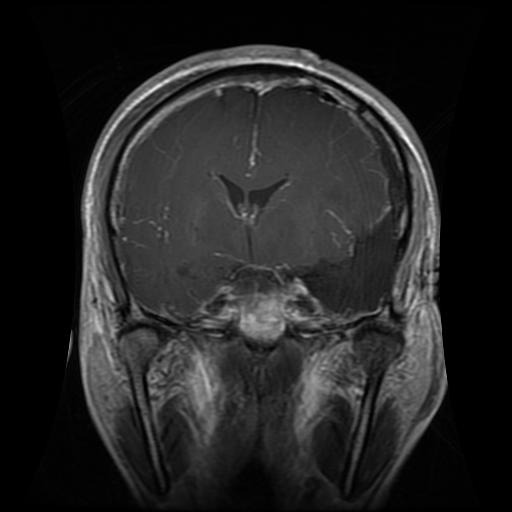

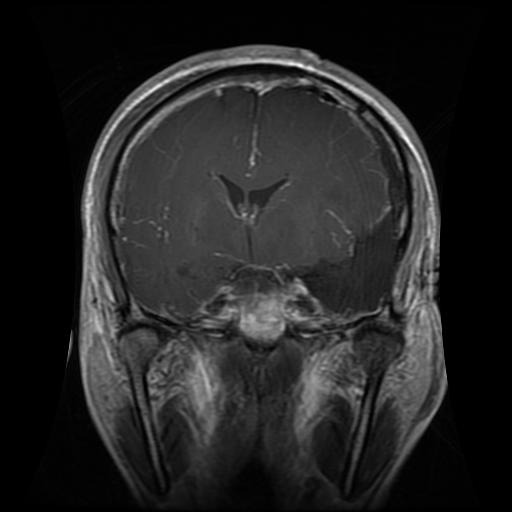

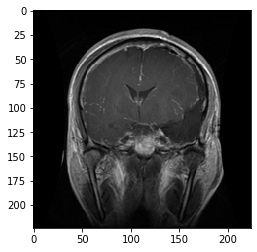

In [ ]:
import numpy as np
from PIL import Image
from imutils import paths


kumpl_gmbr = [] #dataset gambar
kumpl_lbl = [] #label dataset
imgpths = paths.list_images('Dataset_Nida') #path untuk mengambil dataset

gmbr = Image.open("Dataset_Nida/Training/glioma_tumor/gg (297).jpg")
display(gmbr)
gmbs = gmbr.convert('L') #grayscale converter
display(gmbs)
gmbrz = np.array(gmbs.resize((224,224))) #resize + normalisasi
plt.imshow(gmbrz[:,:],cmap=plt.get_cmap('gray'), interpolation='nearest')


gmbrz = np.expand_dims(gmbrz, axis=-1) #penambahan dimensi


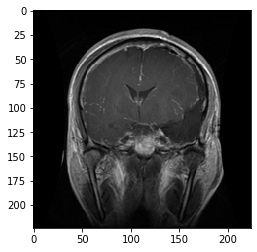

In [ ]:
gmbrzn = gmbrz/255
plt.imshow(gmbrzn[:,:,0],cmap=plt.get_cmap('gray'), interpolation='nearest')

In [ ]:
gmbrzn

array([[[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       ...,

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]]])

In [ ]:
x = latihX[1]
plt.imshow(x[:,:,0], cmap=plt.get_cmap('gray'), interpolation='nearest')
plt.show()
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)
i = 0


for batch in datagen.flow(x, batch_size=1):
  mas = batch[0,:,:,:] #( 150, 150, 3)
  plt.imshow(mas[:,:,0],cmap=plt.get_cmap('gray'), interpolation='nearest')
  plt.show()
  if i == 3:
    break 
  i += 1

Mengubah bentuk label yang masih string ke binary

In [ ]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer() #function untuk mengubah variabel label menjadi bentuk binary
kumpl_lbl = lb.fit_transform(kumpl_lbl) #proses pengubahan
if len(kelas_asli)==2: 
  kumpl_lbl = np.hstack((kumpl_lbl, 1 - kumpl_lbl))

ValueError: ignored

In [ ]:
kumpl_lbl

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       ...,
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0]])

Pemisahan data dari dataset menjadi data latih, uji, dan validasi

In [ ]:
from sklearn.model_selection import train_test_split

ratio_latih = 0.8 #ratio data latih
ratio_uji = 0.2 #ratio data uji
ratio_val = 0.2 #ratio data validasi

(latihX, ujiX, latihY, ujiY) = train_test_split(np.array(kumpl_gmbr),np.array(kumpl_lbl), test_size=1-(ratio_latih-ratio_uji)) #Proses pemisahan, test_size menentukan banyaknya data uji
(ujiX, valX, ujiY, valY) = train_test_split(ujiX, ujiY, test_size=ratio_val/(ratio_uji+ratio_val)) #mendapatkan data validasi dan uji

print(latihX.shape)
print(latihY.shape)
print(ujiX.shape)
print(ujiY.shape)
print(valX.shape)
print(valY.shape)

(1958, 224, 224, 1)
(1958, 4)
(653, 224, 224, 1)
(653, 4)
(653, 224, 224, 1)
(653, 4)


Function Augmentasi

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

Proses Augmentasi data latih

In [ ]:
i=0
banyak_lth=latihX.shape
aug=[]
for jj in range(banyak_lth[0]):
  x = latihX[jj]
  x = x.reshape((1,) + x.shape)  #Penambahan dimensi agar bisa diaugmentasi

  for aug in datagen.flow(x, batch_size=1): #proses augmentasi, memasukkan gambar ke function augmentasi
      latihX = np.append(latihX, aug ,axis=0)
      label = latihY[jj]  #Pengambilan label untuk data augmentasi
      label = label.reshape((1,) + label.shape) 
      latihY = np.append(latihY, label,axis=0)  #Memasukkan label data augment ke variabel label
      if i == 1:
        break 
      i += 1

Reset variabel yang menyimpan model

In [ ]:
AlexNet=[]

Deklarasi model AlexNet

In [ ]:
#Instantiation
AlexNet = Sequential()

#1st Convolutional Layer

AlexNet.add(Conv2D(filters=96, input_shape=(224,224,1), kernel_size=(11,11), strides=(4,4), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#2nd Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#3rd Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#4th Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#5th Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#Passing it to a Fully Connected layer
AlexNet.add(Flatten())
# 1st Fully Connected Layer
AlexNet.add(Dense(4096, input_shape=(224,224,1,)))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
# Add Dropout to prevent overfitting
AlexNet.add(Dropout(0.4)) #Jenis layer

#2nd Fully Connected Layer
AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4)) #Jenis layer

#3rd Fully Connected Layer
AlexNet.add(Dense(1000))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4)) #Jenis layer

#Output Layer
AlexNet.add(Dense(4))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('softmax'))

#Model Summary
AlexNet.summary()

Deklarasi Optimizer dan learning rate-nya

In [ ]:
from tensorflow.keras.optimizers import SGD
sgd = SGD(learning_rate=0.0015) #hyperparameter

In [ ]:
from tensorflow.keras.optimizers import Adam
adam = Adam(learning_rate=0.0015)

In [ ]:
from tensorflow.keras.optimizers import Nadam

nadam = Nadam(learning_rate=0.0015)

In [ ]:
from tensorflow.keras.optimizers import Adamax

adamax = Adamax(learning_rate=0.0015)

In [ ]:
from tensorflow.keras.optimizers import Rmsprop

rmsprop = Rmsprop(learning_rate=0.0015)

ImportError: ignored

Compile Model

In [ ]:
# Compiling the model
#AlexNet.compile(loss = keras.losses.categorical_crossentropy, optimizer= adam, metrics=['accuracy'])
AlexNet.compile(loss = keras.losses.categorical_crossentropy, optimizer= sgd, metrics=['accuracy'])
# AlexNet.compile(loss = keras.losses.categorical_crossentropy, optimizer= nadam, metrics=['accuracy'])
# AlexNet.compile(loss = keras.losses.categorical_crossentropy, optimizer= adamax, metrics=['accuracy'])
# AlexNet.compile(loss = keras.losses.categorical_crossentropy, optimizer= rmsprop, metrics=['accuracy'])

Function early stopping

In [ ]:
class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('val_accuracy') > 0.9):   
          print("\nReached Target")   
          self.model.stop_training = True

Proses 

In [ ]:
callbacks = myCallback()
history = AlexNet.fit(latihX, latihY,validation_data=(ujiX, ujiY), epochs = 55, batch_size = 16, callbacks=[callbacks]) #early stopping
#history = AlexNet.fit(latihX, latihY,validation_data=(ujiX, ujiY), epochs = 55, batch_size = 32) #tanpa early stopping

Epoch 1/55
123/123 [==============================] - 27s 90ms/step - loss: 1.2569 - accuracy: 0.4678 - val_loss: 1.5013 - val_accuracy: 0.2879
Epoch 2/55
123/123 [==============================] - 10s 79ms/step - loss: 0.9920 - accuracy: 0.6057 - val_loss: 1.6086 - val_accuracy: 0.2879
Epoch 3/55
123/123 [==============================] - 10s 80ms/step - loss: 0.9148 - accuracy: 0.6629 - val_loss: 1.5303 - val_accuracy: 0.4058
Epoch 4/55
123/123 [==============================] - 10s 80ms/step - loss: 0.8700 - accuracy: 0.6788 - val_loss: 1.2145 - val_accuracy: 0.5161
Epoch 5/55
123/123 [==============================] - 10s 80ms/step - loss: 0.8198 - accuracy: 0.7130 - val_loss: 0.9078 - val_accuracy: 0.6340
Epoch 6/55
123/123 [==============================] - 10s 80ms/step - loss: 0.7990 - accuracy: 0.7171 - val_loss: 0.7858 - val_accuracy: 0.6953
Epoch 7/55
123/123 [==============================] - 10s 80ms/step - loss: 0.7580 - accuracy: 0.7457 - val_loss: 0.7368 - val_accuracy:

Evaluasi model, nilai-nilai yang dibutuhkan untuk hasil pengujian

In [ ]:
#evaluasi
from sklearn.metrics import classification_report

print("[INFO] evaluating network...")
predictions = AlexNet.predict(valX, batch_size=16) #harus sama dengan training, untuk memvalidasi
print(classification_report(valY.argmax(axis=1), predictions.argmax(axis=1), target_names=lb.classes_))  #ini print dan memunculkan nilai

[INFO] evaluating network...
                  precision    recall  f1-score   support

    glioma_tumor       0.92      0.83      0.87       195
meningioma_tumor       0.88      0.84      0.85       194
        no_tumor       0.84      0.95      0.89        87
 pituitary_tumor       0.91      0.99      0.95       177

        accuracy                           0.89       653
       macro avg       0.89      0.90      0.89       653
    weighted avg       0.89      0.89      0.89       653



Menyimpan model hasil training

In [ ]:
from keras.models import load_model

AlexNet.save('AlexNidAdam.h5')

Menampilkan Grafik Training and Validation

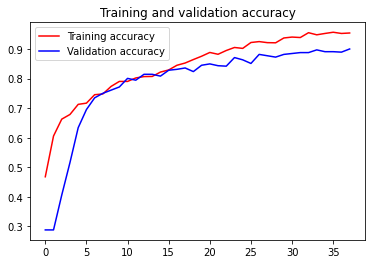

<Figure size 432x288 with 0 Axes>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
#Memasukkan variabel2 dari proses training, menyimpan nilai akurasi val akurasi loss dan val loss

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
#Memunculkan grafik

plt.show()

Menampilkan grafik Loss

Text(0, 0.5, 'Loss')

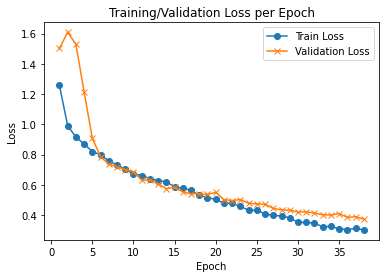

In [ ]:
import matplotlib.pyplot as plt
f, ax = plt.subplots()
ax.plot([None] + history.history['loss'], 'o-')
ax.plot([None] + history.history['val_loss'], 'x-')
# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train Loss', 'Validation Loss'], loc = 0)
ax.set_title('Training/Validation Loss per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')


Menampilkan Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
predict = AlexNet.predict(valX) #Mendapatkan hasil prediksi dari model
rounded_pred=np.argmax(predict, axis=1) #Merubah dimensi
rounded_ujiY=np.argmax(valY, axis=1) #Merubah dimensi
print(confusion_matrix(rounded_ujiY, rounded_pred))


[[161  21   8   5]
 [ 13 162   8  11]
 [  1   1  83   2]
 [  0   1   0 176]]


In [ ]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names=kelas_asli,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    if normalize:
      plt.imshow(cm/7, interpolation='nearest', cmap=cmap)
    else:
      plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.3f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

Function untuk menampilkan gambar confusion matrix

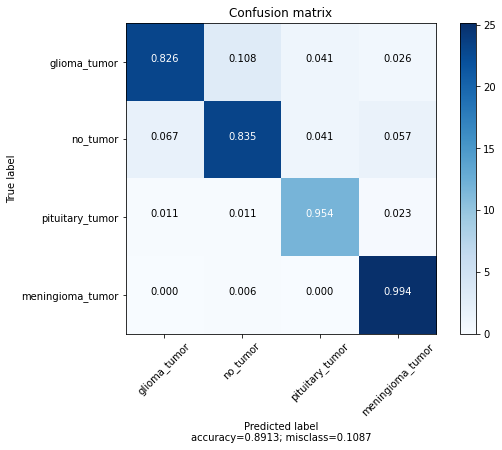

In [ ]:
cm = confusion_matrix(rounded_ujiY,  rounded_pred)
plot_confusion_matrix(cm)

Menampilkan ROC

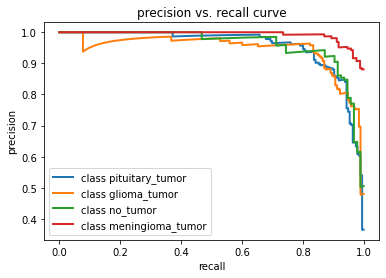

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.preprocessing import label_binarize

predict_prob=AlexNet.predict([valX])

predict_classes=np.argmax(predict_prob,axis=1)

# precision recall curve
precision = dict()
recall = dict()
for i in range(len(kelas_asli)):
    precision[i], recall[i], _ = precision_recall_curve(valY[:, i],
                                                        predict[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(kelas_asli[i]))
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

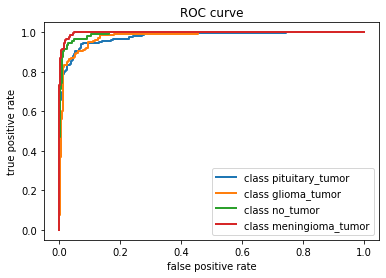

In [ ]:
# roc curve
fpr = dict()
tpr = dict()

for i in range(len(kelas_asli)):
    fpr[i], tpr[i], _ = roc_curve(valY[:, i],
                                  predict[:, i])
    plt.plot(fpr[i], tpr[i], lw=2, label='class {}'.format(kelas_asli[i]))

plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve")
plt.show()

In [ ]:
Acc = 150/165